In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

titanic = pd.read_csv("train.csv")

print(titanic.head(), titanic.info(), titanic.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                           

In [2]:
missing_values = titanic.isnull().sum()
print(missing_values)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64




1.  Nominal Data: The Embarked column contains categorical (nominal) data, where values like 'C', 'Q', and 'S' have no inherent ranking. The mode is suitable for filling missing values as it best represents the most common category.

2. Low Missing Value Count: Only two values are missing in the Embarked column, making the mode a simple and effective choice for imputation without risking data distortion.

3. Data Consistency: Using the mode ensures that the imputed values align with the overall distribution, minimizing the risk of introducing artificial bias or errors.



In [3]:
median_age = titanic["Age"].median()
titanic["Age"].fillna(median_age,inplace = True)

mode_point = titanic["Embarked"].mode()[0]
titanic["Embarked"].fillna(mode_point,inplace = True)

# Drop the original 'Cabin' column
titanic.drop(columns=['Cabin'], inplace=True)

<ipython-input-3-28962f8ee64d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic["Age"].fillna(median_age,inplace = True)
<ipython-input-3-28962f8ee64d>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

**Data Visualization**

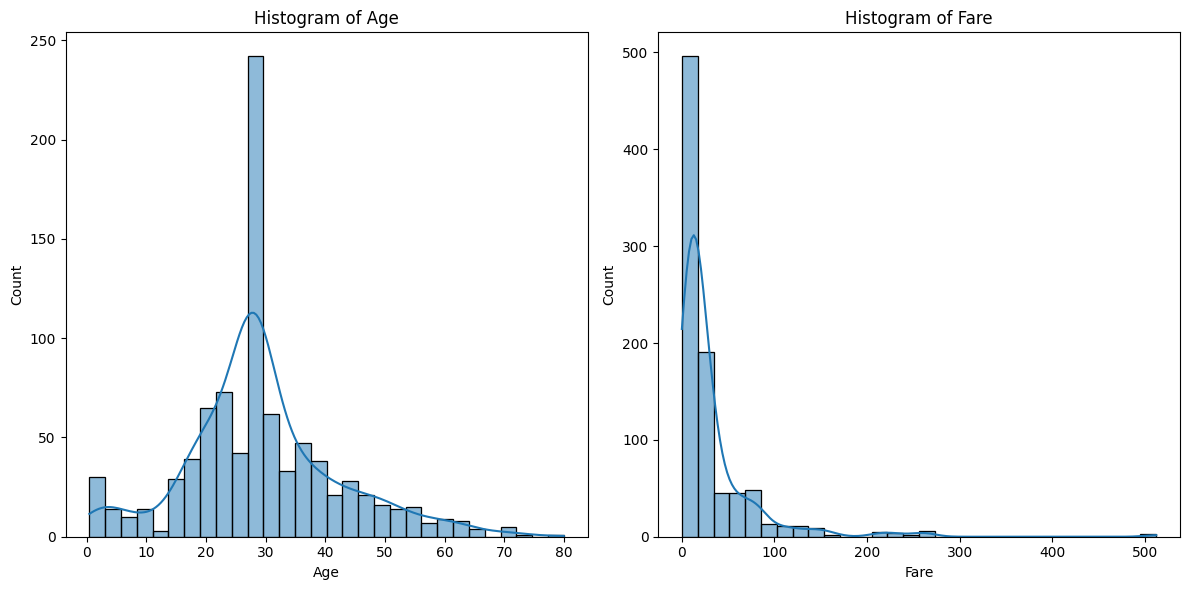

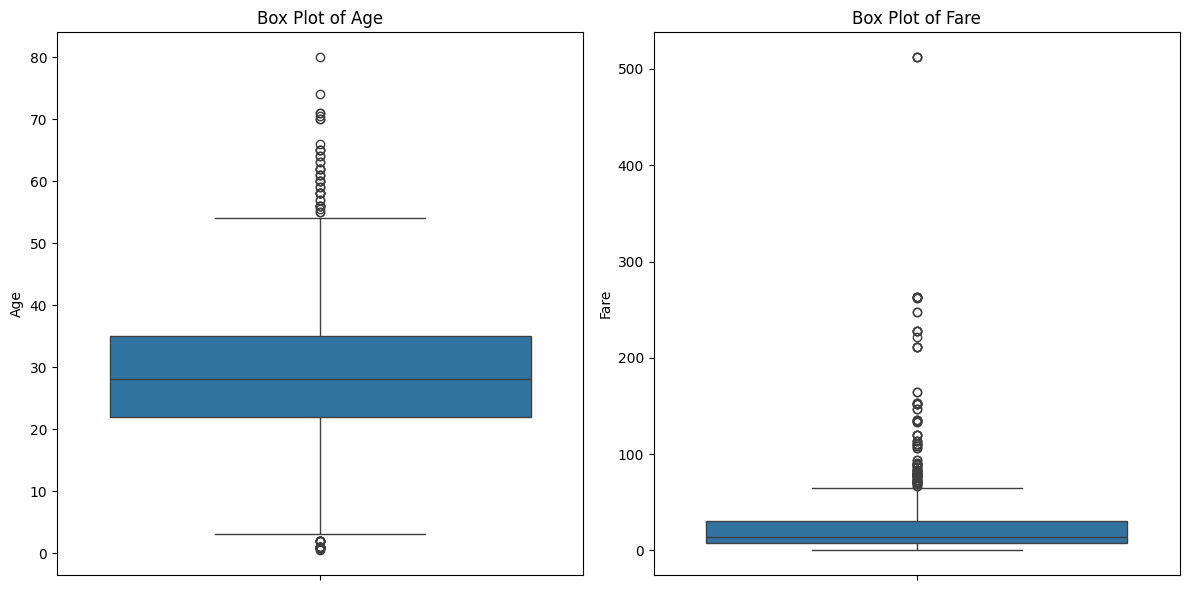

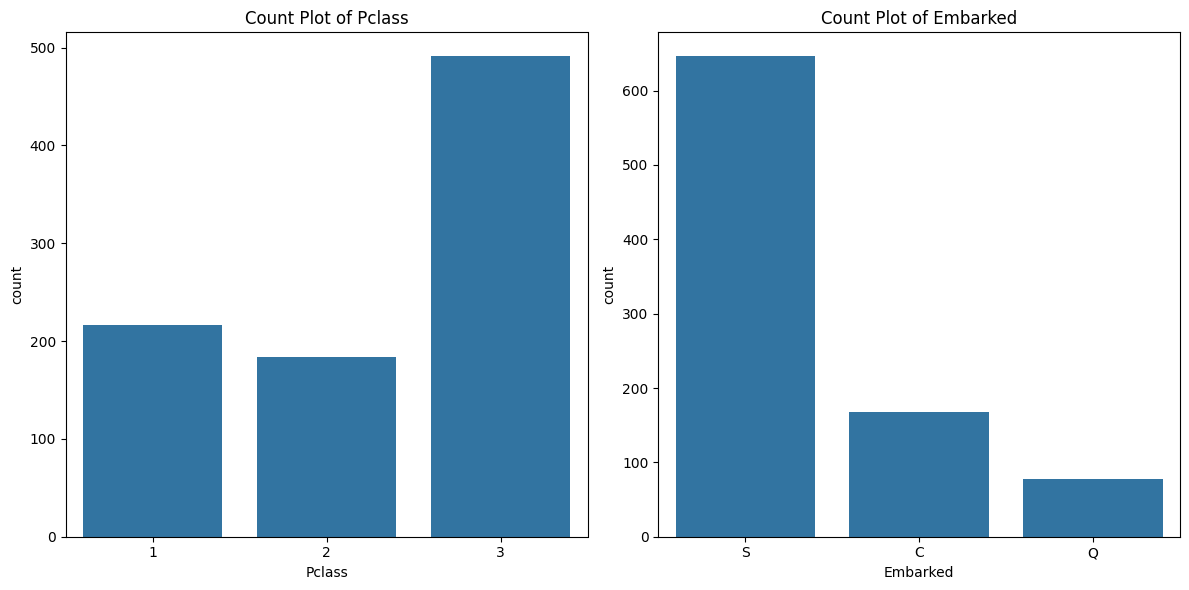

In [4]:
# 1. Histogram and KDE Plots
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(titanic['Age'], bins=30, kde=True)
plt.title('Histogram of Age')

plt.subplot(1, 2, 2)
sns.histplot(titanic['Fare'], bins=30, kde=True)
plt.title('Histogram of Fare')

plt.tight_layout()
plt.show()

# 2. Box Plots
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=titanic['Age'])
plt.title('Box Plot of Age')

plt.subplot(1, 2, 2)
sns.boxplot(y=titanic['Fare'])
plt.title('Box Plot of Fare')

plt.tight_layout()
plt.show()

# 3. Count Plots for Categorical Features
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x=titanic['Pclass'])
plt.title('Count Plot of Pclass')

plt.subplot(1, 2, 2)
sns.countplot(x=titanic['Embarked'])
plt.title('Count Plot of Embarked')

plt.tight_layout()
plt.show()

**Feature Engineering**

In [5]:
# Convert 'Sex' to numerical values
titanic['Sex'] = titanic['Sex'].map({'male': 0, 'female': 1})

In [6]:
# Convert 'Embarked' to numerical values using one-hot encoding
titanic = pd.get_dummies(titanic, columns=['Embarked'])

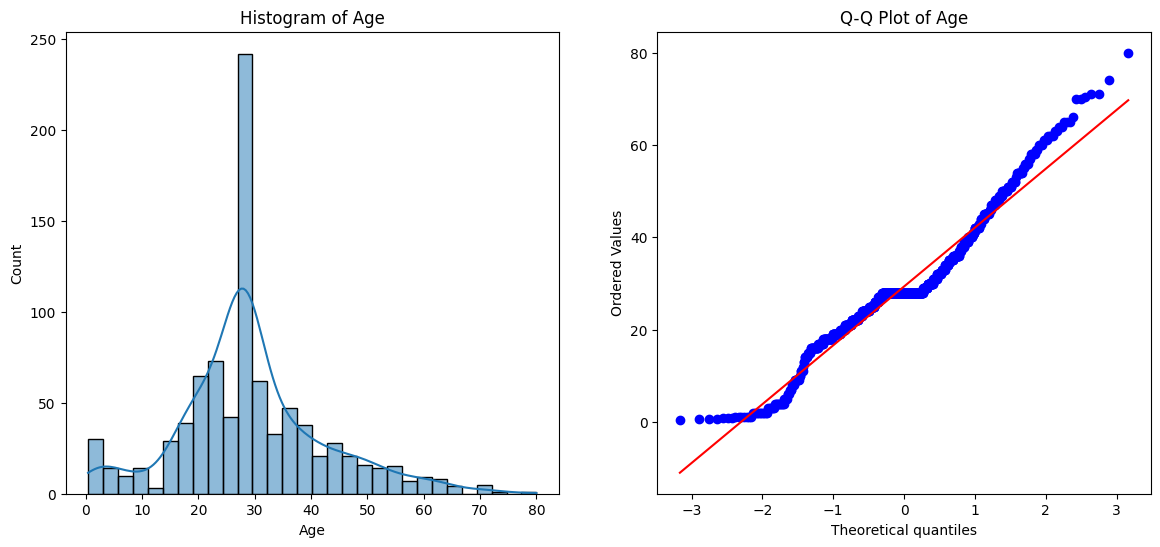

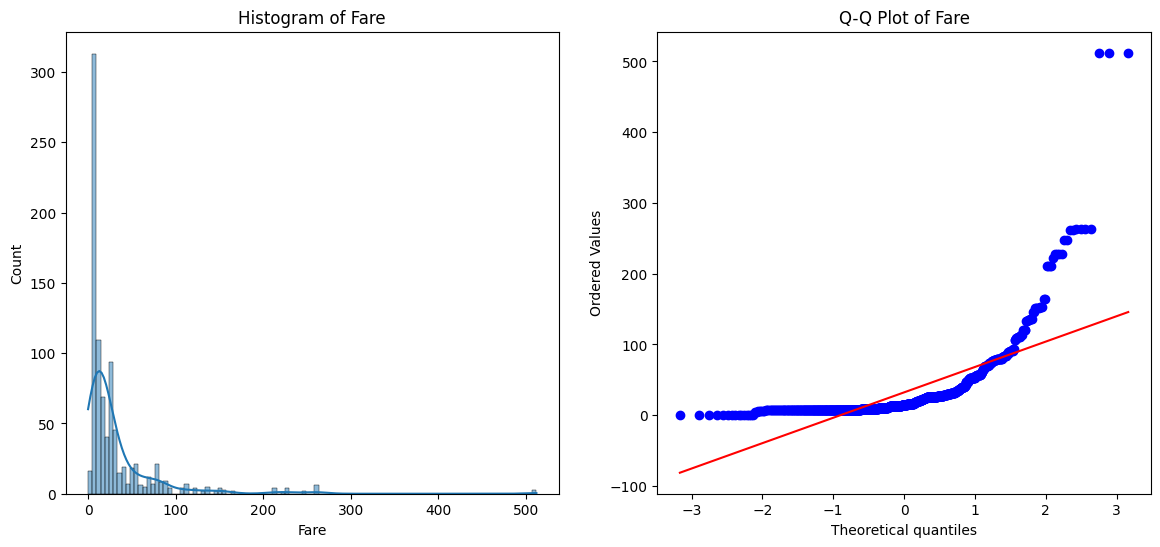

In [7]:
from scipy.stats import shapiro, kstest, norm, probplot

# Histogram and Q-Q Plot for 'Age'
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(titanic['Age'], kde=True)
plt.title('Histogram of Age')

plt.subplot(1, 2, 2)
probplot(titanic['Age'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Age')

plt.show()

# Histogram and Q-Q Plot for 'Fare'
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(titanic['Fare'], kde=True)
plt.title('Histogram of Fare')

plt.subplot(1, 2, 2)
probplot(titanic['Fare'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Fare')

plt.show()

Feature Scaling Techniques

1. Standardization (Z-Score Normalization)
Scales the features to have a mean of zero and a standard deviation of one.
It is useful when the features follow a Gaussian distribution (normal distribution).
Formula: Z = (X - μ) / σ
X: Value, μ: Mean, σ: Standard Deviation

2. MinMaxScaler (Normalization)
Transforms the features to a specific range, typically [0, 1].
It is useful when the features do not follow a Gaussian distribution and need to be within a specific range.
Formula: X_scaled = (X - X_min) / (X_max - X_min)
X_min: Minimum value of the feature, X_max: Maximum value of the feature

3. Robust Scaling
Uses the median and the interquartile range (IQR) for scaling.
It is useful for datasets with outliers, as it reduces the impact of outliers.


So here, we observe that in Age column, the data points follow the red line in the middle but deviate at the tails, especially in the upper range. This means there are some deviations from normality, particularly for extreme ages.

However, for the Fare column we see that the data points, especially at the tails, deviate heavily from the red line, confirming the presence of outliers and skewness. Most passengers paid lower fares, while a few paid much higher amounts.

In [8]:
from scipy.stats import kstest

# Kolmogorov-Smirnov Test for Age
# Note: We should standardize 'Age' before applying the Kolmogorov-Smirnov test
standardized_age = (titanic['Age'] - titanic['Age'].mean()) / titanic['Age'].std()
stat, p = kstest(standardized_age, 'norm')
print('Kolmogorov-Smirnov Test Statistic for Age:', stat)
print('p-value for Age:', p)
if p > 0.05:
    print('The Age data is normally distributed (fail to reject H0)')
else:
    print('The Age data is not normally distributed (reject H0)')

# Kolmogorov-Smirnov Test for Fare
# Note: We should standardize 'Fare' before applying the Kolmogorov-Smirnov test
standardized_fare = (titanic['Fare'] - titanic['Fare'].mean()) / titanic['Fare'].std()
stat, p = kstest(standardized_fare, 'norm')
print('Kolmogorov-Smirnov Test Statistic for Fare:', stat)
print('p-value for Fare:', p)
if p > 0.05:
    print('The Fare data is normally distributed (fail to reject H0)')
else:
    print('The Fare data is not normally distributed (reject H0)')

Kolmogorov-Smirnov Test Statistic for Age: 0.1465831994748112
p-value for Age: 3.5760365288329853e-17
The Age data is not normally distributed (reject H0)
Kolmogorov-Smirnov Test Statistic for Fare: 0.28184804098597455
p-value for Fare: 4.179692707891544e-63
The Fare data is not normally distributed (reject H0)


Kolmogorov-Smirnov Test for Normality
The Kolmogorov-Smirnov test compares a dataset to a normal distribution.

Formula:
𝑍
=
(
𝑋
−
𝜇
)
𝜎
Z=
σ
(X−μ)
​

Where:
𝑋
X = Data value,
𝜇
μ = Mean,
𝜎
σ = Standard deviation
Interpretation:
If p-value > 0.05, data is normally distributed.
If p-value < 0.05, data is not normally distributed.
Both Age and Fare fail the normality test, so:

Use MinMaxScaler for Age.
Use RobustScaler for Fare due to outliers.


In [9]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler

age_scaler = MinMaxScaler()
fare_scaler = RobustScaler()

# Fit and transform the selected features
titanic['Age'] = age_scaler.fit_transform(titanic[['Age']])
titanic['Fare'] = fare_scaler.fit_transform(titanic[['Fare']])

# Display the first few rows of the modified dataset
print(titanic.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex       Age  SibSp  \
0                            Braund, Mr. Owen Harris    0  0.271174      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  0.472229      1   
2                             Heikkinen, Miss. Laina    1  0.321438      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  0.434531      1   
4                           Allen, Mr. William Henry    0  0.434531      0   

   Parch            Ticket      Fare  Embarked_C  Embarked_Q  Embarked_S  
0      0         A/5 21171 -0.312011       False       False        True  
1      0          PC 17599  2.461242        True       False       False  
2      0  STON/O2. 3101282 -0.282777       False       False        True  
3      0      

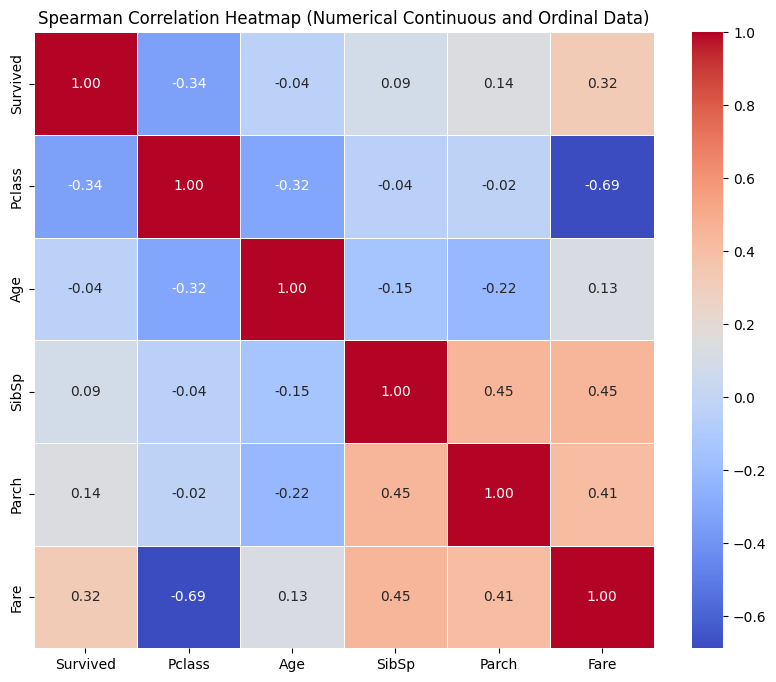

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate Spearman correlation matrix for numerical continuous and ordinal variables
spearman_corr = titanic[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr(method='spearman')

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Spearman Correlation Heatmap (Numerical Continuous and Ordinal Data)')
plt.show()

Key Takeaways for the survival column we intend to predict:

* Positively Correlated with Fare (0.32): Passengers who paid higher fares tend to have higher survival rates.
* Negatively Correlated with Pclass (-0.34): Lower class passengers (higher Pclass value) tend to have lower survival rates.
* Weak Positive Correlation with SibSp (0.09): Passengers with more siblings/spouses aboard have a slightly higher chance of survival.
* Weak Positive Correlation with Parch (0.14): Passengers with more parents/children aboard also have a slightly higher chance of survival.

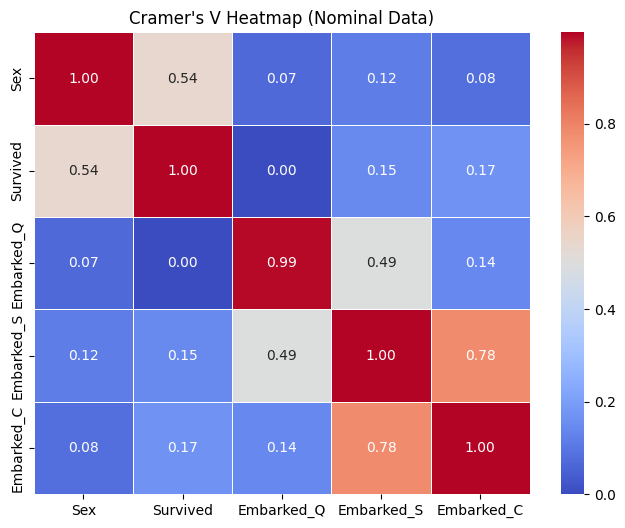

In [12]:
from scipy.stats import chi2_contingency

titanic_copy = titanic.copy()
# Bringing back Embarked_C,
#for easy visualization of correlation between Embakation point C and Survival,
# we will not need it for prediction after we have preprocessed our test data.
titanic_copy['Embarked_C'] = 1 - (titanic_copy['Embarked_Q'] + titanic_copy['Embarked_S'])

nominal_cols = ['Sex', 'Survived', 'Embarked_Q', 'Embarked_S', 'Embarked_C']


# Function to calculate Cramer's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    if confusion_matrix.size == 0:
        return np.nan
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    return np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))

# Calculate Cramer's V matrix for nominal variables
cramers_v_matrix = pd.DataFrame(index=nominal_cols, columns=nominal_cols)

for col1 in nominal_cols:
    for col2 in nominal_cols:
        cramers_v_matrix.loc[col1, col2] = cramers_v(titanic_copy[col1], titanic_copy
         [col2])

cramers_v_matrix = cramers_v_matrix.astype(float)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cramers_v_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Cramer\'s V Heatmap (Nominal Data)')
plt.show()

- **Sex and Survived (0.54):** There is a moderate association between gender and survival, suggesting women had a higher chance of survival than men.
- **Survived and Embarked_Q (0.00):** No significant association between survival and boarding point Queenstown (Q), meaning passengers from Queenstown had similar survival rates as others.
- **Survived and Embarked_S (0.15):** A weak association between survival and boarding point Southampton (S), suggesting a slight difference in survival likelihood for Southampton passengers.
- **Survived and Embarked_C (0.17):** A weak association between survival and boarding point Cherbourg (C), indicating slightly higher survival rates for Cherbourg passengers, but the effect is weak.